In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
em=('/content/drive/MyDrive/INTERNSHIP/Madhu/Random_Forest/emotional_monitoring.csv')
df=pd.read_csv(em)

In [3]:
df.head()

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,disengaged,focused,3


In [4]:
df.isnull().sum()

,0
HeartRate,0
SkinConductance,0
EEG,0
Temperature,0
PupilDiameter,0
SmileIntensity,0
FrownIntensity,0
CortisolLevel,0
ActivityLevel,0
AmbientNoiseLevel,0


In [6]:
le = LabelEncoder()
y = le.fit_transform(df['EmotionalState'])

In [7]:
x=df[['ActivityLevel','AmbientNoiseLevel','LightingLevel','EngagementLevel']]
y=df['EmotionalState']
print(x.shape)
print(y.shape)

(1000, 4)
(1000,)


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model=RandomForestClassifier(n_estimators=4,max_depth=3,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=4, random_state=42)

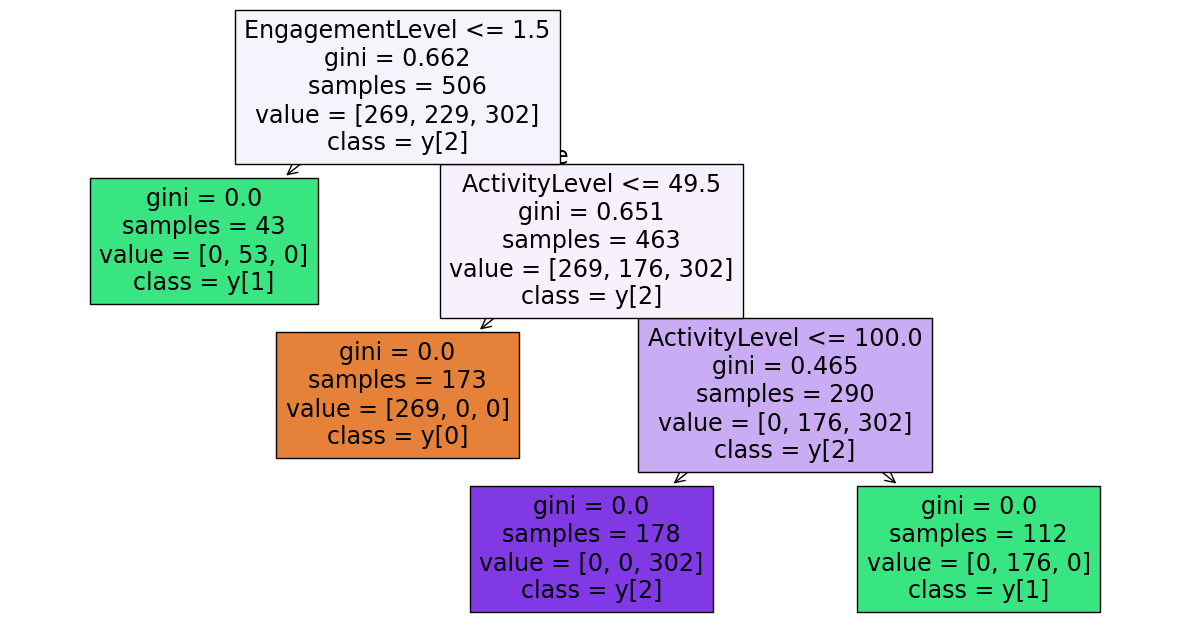

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plot_tree(
    model.estimators_[0],
    feature_names=x_train.columns,
    class_names=True,
    filled=True
)
plt.show()